In [1]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
if cwd != '/Users/yujijeong/Desktop/Hopper':
    os.chdir('/Users/yujijeong/Desktop/Hopper')

In [3]:
# Reading the puzzle.csv 
data = pd.read_csv('puzzle.csv', header=None)
data = data.rename(columns={0: "latitude", 1: 'longitude'})
long = data.loc[:,['longitude']].mul(55.22251)
lat = data.loc[:,['latitude']].mul(59.28124)

In [4]:
# Reading the global-airports.geojson
import geopandas
airports = geopandas.read_file(open('global-airports.geojson'))

In [8]:
# I found another set of data online that contains information on the top 50 most visited airports
# on https://data.world/datagov-uk/2ecd2a35-fc85-4cd9-b1e7-3a8f92d76fd7
# I can plot the top 50 most visited airports on the plot to check if they are plotted within the boundaries
# of the blue datapoints. If they do, my guess that the blue datapoints represent the most visited
# international airports may be correct.
most_visited = pd.read_excel('largest-global-airports-by-passenger-traffic-1.xls', sheet_name='Total Passengers 2015', header=0)

# Renaming one column
most_visited.rename(columns={'Code (IATA/ICAO)': "iata"}, inplace=True)
most_visited = most_visited.iloc[:,[1,2,3,4,5]]

In [9]:
# The data is ordered from highest to lowest number of passengers in 2015.
most_visited.head()

,Airport,Location,Country,iata,Total passengers
0,Hartsfield-Jackson Atlanta International Airport,Atlanta GA,USA,ATL,101491106
1,Beijing Capital International Airport,Beijing,China (People's Republic of China),PEK,89938628
2,Dubai International Airport,Dubai,United Arab Emirates,DXB,78014841
3,O'Hare International Airport,Chicago IL,USA,ORD,76949504
4,Tokyo International (Haneda) Airport,Tokyo,Japan,HND,75573106


In [10]:
# There are no null values
most_visited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airport           50 non-null     object
 1   Location          50 non-null     object
 2   Country           50 non-null     object
 3   iata              50 non-null     object
 4   Total passengers  50 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [11]:
# I can right-join (innerjoin) the 'airports' data to this dataset on the column 'iata' (three letter code of an airport).
# I will keep indices and features of the dataset 'most_visited' only.
merged = pd.merge(most_visited, right=airports.loc[:,['iata','longitude','latitude']], on='iata', how='left')

In [14]:
merged.tail()

,Airport,Location,Country,iata,Total passengers,longitude,latitude
45,Kunming International Airport,Kunming,China (People's Republic of China),KMG,37523220,NaN,NaN
46,Newark Liberty International Airport,Newark NJ,USA,EWR,37494704,NaN,NaN
47,Narita International Airport,Tokyo,Japan,NRT,37268307,140.38639,35.76472
48,Ninoy Aquino International Airport,Manila,Philippines,MNL,36583459,121.01940,14.50861
49,Minneapolis/St Paul International Airport,Minneapolis MN,USA,MSP,36582854,NaN,NaN


In [12]:
# There was only 16 airports in 'most_visited' that could find its coordinates in 'airports'.
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airport           50 non-null     object 
 1   Location          50 non-null     object 
 2   Country           50 non-null     object 
 3   iata              50 non-null     object 
 4   Total passengers  50 non-null     int64  
 5   longitude         16 non-null     float64
 6   latitude          16 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ KB


In [15]:
# I will add the missing coordinates. The coordinates are again found by googling!
missing = merged[merged.longitude.isnull()].index
missing_longitude = [-84.4277, 116.6031, 55.3657, -87.9073, -0.4543, -118.4085, 113.9185, 2.5425, -97.0403, 8.5622,
    121.8083, 4.7683, -73.7781, 113.3080, -104.6737, 126.4407, 3.5676, -115.1540, -80.9473, -112.0078, -95.3368, -122.3088,
    103.9493, -79.6248, 11.7751, 12.2462, -0.1821, 151.1753, -46.4730, 121.3343, 121.2342, 102.9286, -74.1745, -93.2223]
missing_latitude = [33.6407, 40.0799, 25.2532, 41.9742, 51.4700, 33.9416, 22.3080, 49.0139, 32.8998, 50.0379, 31.1443, 52.3105,
    40.6413, 23.3959, 39.8561, 37.4602, 40.4983, 36.0860, 35.2144, 33.4373, 29.9902, 47.4502, 30.5675, 43.6777, 48.3537,
    41.7999, 51.1537, -33.9399, -23.4306, 31.1922, 25.0797, 25.0966, 40.6895, 44.8848]

for i in range(0,34):
    merged.loc[missing[i],'longitude'] = missing_longitude[i]
    merged.loc[missing[i],'latitude'] = missing_latitude[i]

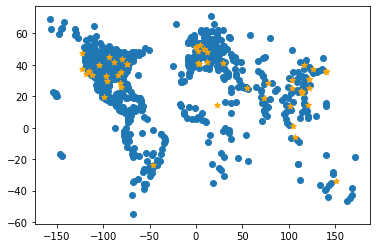

In [16]:
# Plotting the top 50 most visited airports around the world.
# The orange datapoints are plotted within where the blue datapoints are, except one point at approx. [25, 18]
# on Northern Africa - investigated below.
fig, ax = plt.subplots()
ax.scatter(long, lat)
ax.scatter(merged.longitude, merged.latitude, color='orange', marker='*')
plt.show()

In [18]:
# I investigate the orange datapoint that is not within the blue datapoints
investigate = merged[merged.longitude>=20].index.intersection(merged[merged.longitude<=40].index).intersection(
    merged[merged.latitude>=10].index.intersection(merged[merged.latitude<=20].index))

# Although the orange datapoint seems to be located somewhere in Northern Africa, the data says that it's located in
# Kuala Lumpur, Malaysia which should be located in Southern Asia.
merged.loc[investigate]

,Airport,Location,Country,iata,Total passengers,longitude,latitude
22,KL International Airport,Kuala Lumpur,Malaysia,KUL,48938424,22.45003,14.37137


In [19]:
# Searching up the coordinate [22.45003, 14.37137] on Google maps, the satellite view shows me a place in the vast desserts
# where there are no any types of building. This is likely an erroneous data entry.
# I will replace this coordinate for KUL airport with a correct one.
# It is important to note that the 'most_visited' dataset may possibly contain other errors and so it is not
# a reliable dataset.
merged.loc[investigate, 'longitude'] = 101.7051
merged.loc[investigate, 'latitude'] = 2.7347

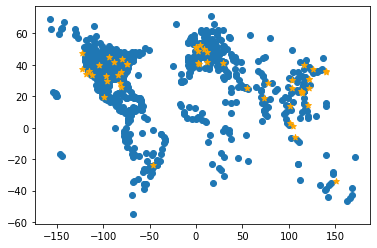

In [20]:
# Re-plotting, now I see that all the orange datapoints are within the blue datapoints.
# The hypothesis that the blue datapoints represent the most visited airports may be correct.
fig, ax = plt.subplots()
ax.scatter(long, lat)
ax.scatter(merged.longitude, merged.latitude, color='orange', marker='*')
plt.show()

In [ ]:
# CONCLUSION:
# The scatter plot of the top 50 most visited airports are all within the datapoints of the puzzle data. 
# This means that there is a high chance that the puzzle data represents locations of the most visited airports
# around the world. It would be interesting to plot the top 500 or even, top 1000 most visited airports instead of
# only top 50.